In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

# Load dataset
titanic = pd.read_csv('train.csv')

# Fill missing values
titanic['Age'].fillna(titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0], inplace=True)

# Feature engineering
titanic['FamilySize'] = titanic['SibSp'] + titanic['Parch'] + 1
titanic['IsAlone'] = (titanic['FamilySize'] == 1).astype(int)

# Extract titles from names
titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

# Encode categorical variables
titanic = pd.get_dummies(titanic, columns=['Sex', 'Embarked', 'Pclass', 'Title'], drop_first=True)

# Scale numerical features
scaler = StandardScaler()
titanic['Fare'] = scaler.fit_transform(titanic[['Fare']])
titanic['Age'] = scaler.fit_transform(titanic[['Age']])

# Drop irrelevant features
titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

# Separate features and target variable
X = titanic.drop('Survived', axis=1)
y = titanic['Survived']


<>:17: SyntaxWarning: invalid escape sequence '\.'
<>:17: SyntaxWarning: invalid escape sequence '\.'
C:\Users\yukte\AppData\Local\Temp\ipykernel_21252\541184218.py:17: SyntaxWarning: invalid escape sequence '\.'
  titanic['Title'] = titanic['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)
C:\Users\yukte\AppData\Local\Temp\ipykernel_21252\541184218.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['Age'].fillna(titanic.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
C:\Users\yukte\AppData\Loca

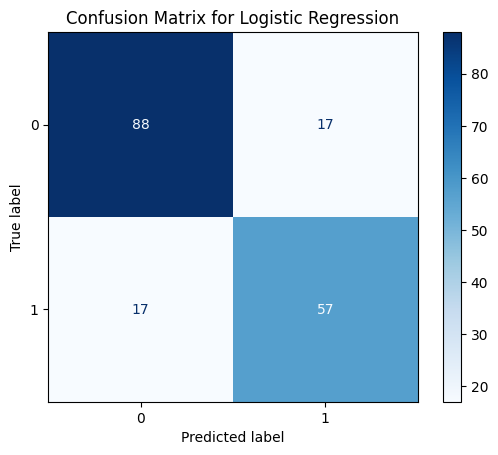

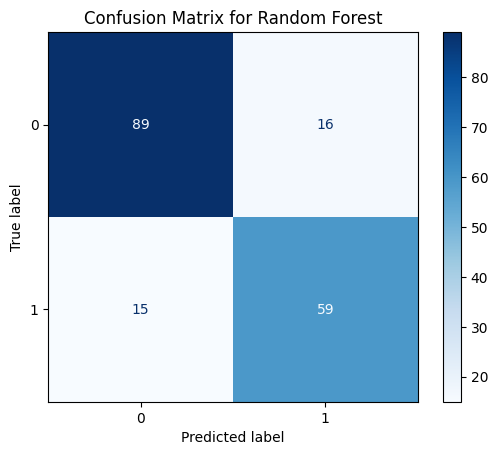

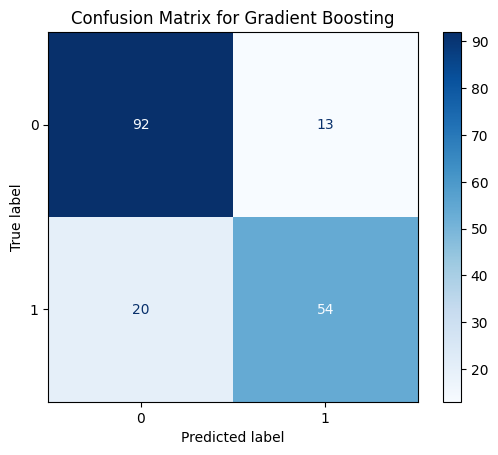

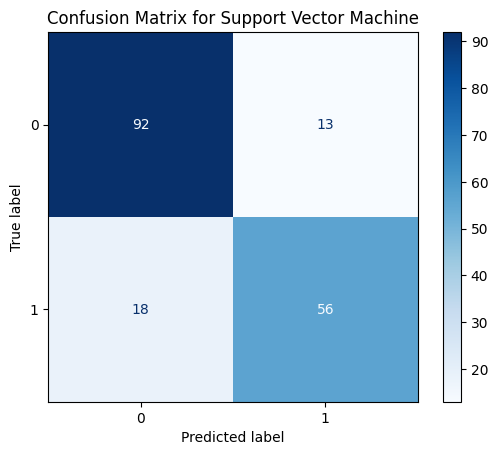

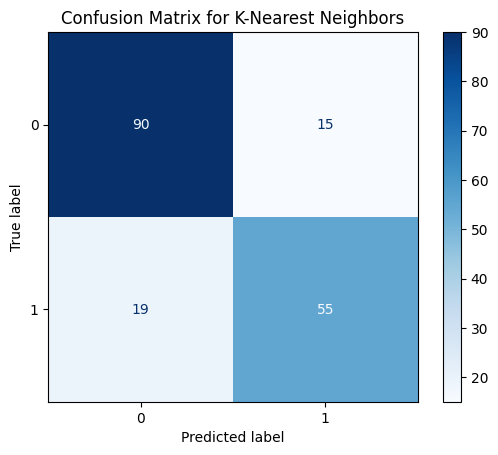

+----+------------------------+-----------------+-------------+----------+------------+
|    | Model                  |   Test Accuracy |   Precision |   Recall |   F1 Score |
+====+========================+=================+=============+==========+============+
|  0 | Logistic Regression    |        0.810056 |    0.77027  | 0.77027  |   0.77027  |
+----+------------------------+-----------------+-------------+----------+------------+
|  1 | Random Forest          |        0.826816 |    0.786667 | 0.797297 |   0.791946 |
+----+------------------------+-----------------+-------------+----------+------------+
|  2 | Gradient Boosting      |        0.815642 |    0.80597  | 0.72973  |   0.765957 |
+----+------------------------+-----------------+-------------+----------+------------+
|  3 | Support Vector Machine |        0.826816 |    0.811594 | 0.756757 |   0.783217 |
+----+------------------------+-----------------+-------------+----------+------------+
|  4 | K-Nearest Neighbors    | 

In [4]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from tabulate import tabulate

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

# Evaluate models and compute detailed metrics
results = []
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    results.append({
        'Model': model_name,
        'Test Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    })
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Create results DataFrame
results_df = pd.DataFrame(results)

# Print results
print(tabulate(results_df, headers='keys', tablefmt='grid'))

+----+------------------------+-------------------------------+------------------------------+-----------------+-------------+----------+------------+
|    | Model                  |   Cross-Validation Score Mean |   Cross-Validation Score Std |   Test Accuracy |   Precision |   Recall |   F1 Score |
+====+========================+===============================+==============================+=================+=============+==========+============+
|  0 | Logistic Regression    |                      0.827223 |                   0.018335   |        0.810056 |    0.77027  | 0.77027  |   0.77027  |
+----+------------------------+-------------------------------+------------------------------+-----------------+-------------+----------+------------+
|  1 | Random Forest          |                      0.80197  |                   0.00923665 |        0.821229 |    0.776316 | 0.797297 |   0.786667 |
+----+------------------------+-------------------------------+------------------------------+-----------------+-------------+----------+------------+
|  2 | Gradient Boosting      |                      0.815956 |                   0.0214605  |        0.815642 |    0.80597  | 0.72973  |   0.765957 |
+----+------------------------+-------------------------------+------------------------------+-----------------+-------------+----------+------------+
|  3 | Support Vector Machine |                      0.8314   |                   0.0222223  |        0.826816 |    0.811594 | 0.756757 |   0.783217 |
+----+------------------------+-------------------------------+------------------------------+-----------------+-------------+----------+------------+
|  4 | K-Nearest Neighbors    |                      0.801911 |                   0.0201061  |        0.810056 |    0.785714 | 0.743243 |   0.763889 |
+----+------------------------+-------------------------------+------------------------------+-----------------+-------------+----------+------------+